In [817]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import random
import matplotlib.pyplot as plt

Let's upload our datasets for this analysis

In [818]:
items = pd.read_csv("./files/olist_order_items_dataset.csv")
orders = pd.read_csv("./files/olist_orders_dataset.csv")
pay = pd.read_csv("./files/olist_order_payments_dataset.csv")

In [819]:
# Let's see our items in transactions
items = pd.read_csv("./files/olist_order_items_dataset.csv")
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [820]:
# Let's evaluate the datatypes and null values
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


We don't have any null values, but some columsn has a datatype as object when it suppose to be datetime. Let's change it

In [821]:
# Change column shipping_limit_date to a datatime Dtype
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Great! Now let's evaluate other dataset

In [822]:
# Let's check our orders data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [823]:
# Let's see the null values and datatypes
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


We can see that some columns don't have the right datatype. Let's change them

In [824]:
# Change object to datatime Dtype
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
orders[date_columns] = orders[date_columns].apply(pd.to_datetime)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Perfect! Now that we have the right datatypes, let's evaluate our null values.

In [825]:
# Let's see our first column with null values that is oder_approved_at
orders[orders['order_approved_at'].isnull()].value_counts('order_status')

order_status
canceled     141
delivered     14
created        5
dtype: int64

As we can see most of them are canceled and created orders, so we can drop them. Created orders as well because doesn't have the dates yet.

In [826]:
# Remove cancel and created orders from our dataset
orders = orders[(orders['order_status'] != 'canceled') & (orders['order_status'] != 'created')]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98811 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98811 non-null  object        
 1   customer_id                    98811 non-null  object        
 2   order_status                   98811 non-null  object        
 3   order_purchase_timestamp       98811 non-null  datetime64[ns]
 4   order_approved_at              98797 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98811 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


What about our delivered orders? Let's filter our data to evaluate this datapoints

In [827]:
# Null rows with order_status delivered
orders[orders['order_approved_at'].isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


We can observe that it is just missing our approved date. We can take the average of other orders and fill it.

In [828]:
# Let's calculate the average of the delivered orders when the customer purchased the product and when the order when approved.
average_difference = (orders['order_approved_at'] - orders['order_purchase_timestamp']).mean()
average_difference


Timedelta('0 days 10:23:53.854246586')

Our mean is around 10 hours, so let's fill this row with this value.

In [829]:
# Fill null values in 'order_approved_at' with the calculated average difference
orders['order_approved_at'].fillna(orders['order_purchase_timestamp'] + average_difference, inplace=True)
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98811 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98811 non-null  object        
 1   customer_id                    98811 non-null  object        
 2   order_status                   98811 non-null  object        
 3   order_purchase_timestamp       98811 non-null  datetime64[ns]
 4   order_approved_at              98811 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98811 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


Great! Now we can see the other null values, let's start with order_delivered_customer_date

In [830]:
# Let's see null values from order_delivered_carrier_date
orders[orders['order_delivered_carrier_date'].isnull()].value_counts('order_status')

order_status
unavailable    609
invoiced       314
processing     301
approved         2
delivered        2
dtype: int64

In [831]:
# Let's see those who say unavailable
orders[orders['order_status'] == 'unavailable'].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

After checking the null values, we see that the two columns don't have the information we need. Let's drop these rows because it's complicated to calculate both columns.

In [832]:
# Remove rows with null values of order_delivered_carrier_date and order_delivered_customer_date
orders = orders[(orders['order_delivered_carrier_date'].notna()) & (orders['order_delivered_customer_date'].notna())]
orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96469 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96469 non-null  object        
 1   customer_id                    96469 non-null  object        
 2   order_status                   96469 non-null  object        
 3   order_purchase_timestamp       96469 non-null  datetime64[ns]
 4   order_approved_at              96469 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 6   order_delivered_customer_date  96469 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96469 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Awesome! Now we can continue to our third dataset

In [833]:
# Let's see our payment data
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Great! Our three datasets are ready to be analyzed.

## Exploratory Data Analysis

In [834]:
# Let's look out for the top 10 products that have been sold
items['product_id'].value_counts().head(10)

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
53759a2ecddad2bb87a079a1f1519f73    373
d1c427060a0f73f6b889a5c7c61f2ac4    343
53b36df67ebb7c41585e8d54d6772e08    323
154e7e31ebfa092203795c972e5804a6    281
3dd2a17168ec895c781a9191c1e95ad7    274
Name: product_id, dtype: int64

Let's see the prices over time of our most sold product but first we need to merge the datasets items and orders to have the purchased date

In [835]:
# Let's merge our datasets
orders_items = pd.merge(orders, items, on='order_id')
# Let's see how many items were sold by year
orders_items['order_purchase_year'] = orders_items['order_purchase_timestamp'].dt.year
orders_items['order_purchase_year'].value_counts()

2018    60318
2017    49553
2016      317
Name: order_purchase_year, dtype: int64

We can see that 2016 doesn't have enough data comparing to other years, let's remove it and keep just with the years that have more data.

In [836]:
# Remove 2016 from our dataset
orders_items = orders_items[orders_items['order_purchase_year'] != 2016]

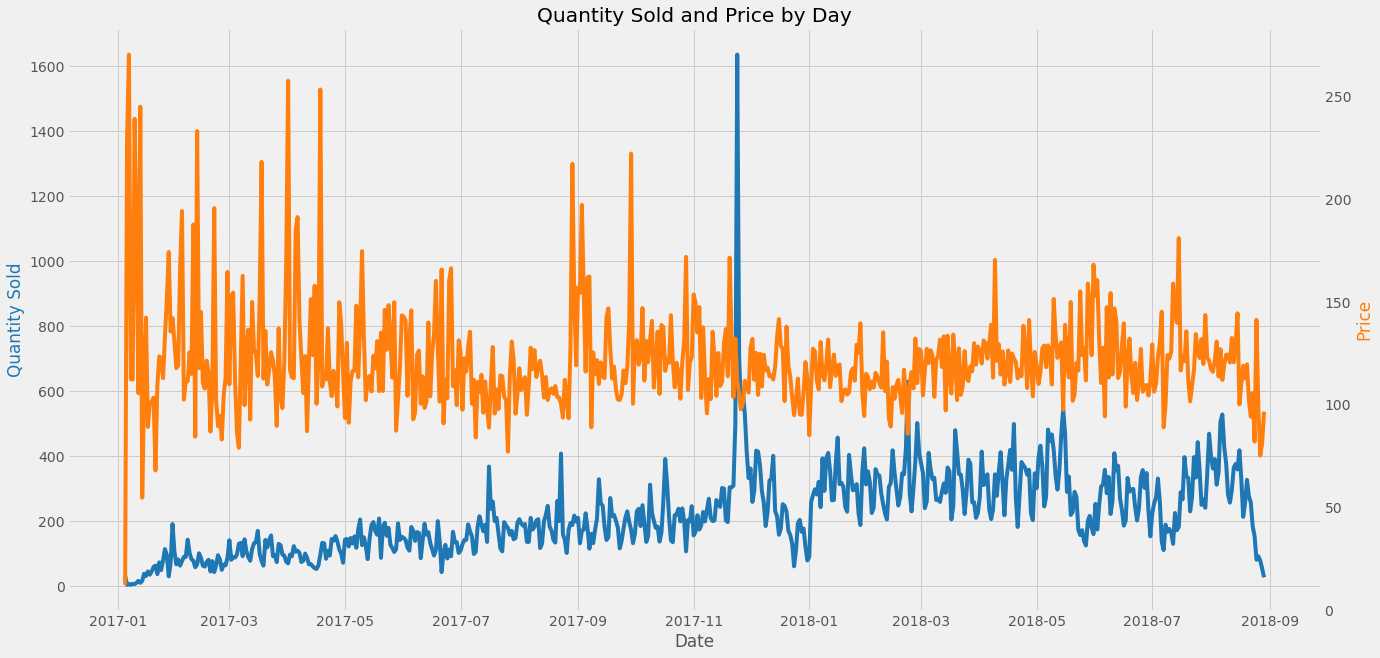

In [837]:
# Group data by day and calculate sum of quantity sold and mean price
daily_sales = orders_items.groupby(orders_items['order_purchase_timestamp'].dt.date).agg({'price': 'mean', 'freight_value': 'mean', 'order_item_id': 'sum'}).reset_index()
# Let's change the name of the columns order_item_id to quantity_sold and order_purchase_timestamp to date
daily_sales.rename(columns={'order_item_id': 'quantity_sold', 'order_purchase_timestamp': 'date'}, inplace=True)

# Specify the figure size (width, height) in inches
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Create two subplots with the shared x-axis
ax1, ax2, ax3 = plt.axes(), plt.subplot(), plt.subplot()

# Plot quantity sold (quantity_sold) using the first y-axis (ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Quantity Sold', color='tab:blue')
ax1.plot(daily_sales['date'], daily_sales['quantity_sold'], color='tab:blue')
#ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (ax2) and plot price using it
ax2 = ax1.twinx()  # share the same x-axis
ax2.set_ylabel('Price', color='tab:orange')
ax2.plot(daily_sales['date'], daily_sales['price'], color='tab:orange')
#ax2.tick_params(axis='y', labelcolor='tab:orange')

# Customize the appearance of the plot
plt.title('Quantity Sold and Price by Day')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

We can observe that we have an outlier in 2017, let's look at the exact day and what represent this outlier

In [838]:
# Date of the outlier
daily_sales[daily_sales['quantity_sold'] == daily_sales['quantity_sold'].max()]

,date,price,freight_value,quantity_sold
323,2017-11-24,111.462141,18.782067,1636


This date matches with Black Friday so it's ok that we have a higher volume of sales.

How about price and freight value over time?

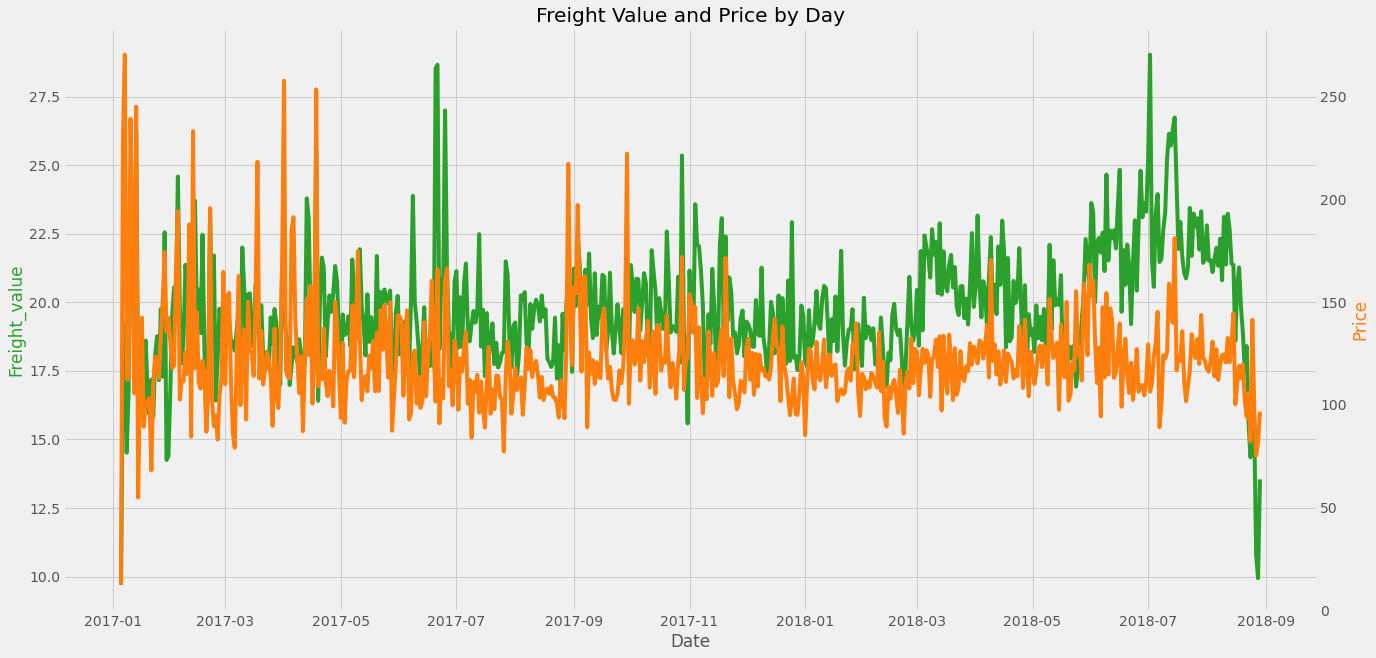

In [839]:
# Specify the figure size (width, height) in inches
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Create two subplots with the shared x-axis
ax1, ax2, ax3 = plt.axes(), plt.subplot(), plt.subplot()

# Plot quantity sold (order_item_id) using the first y-axis (ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Freight_value', color='tab:green')
ax1.plot(daily_sales['date'], daily_sales['freight_value'], color='tab:green')
#ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (ax2) and plot price using it
ax2 = ax1.twinx()  # share the same x-axis
ax2.set_ylabel('Price', color='tab:orange')
ax2.plot(daily_sales['date'], daily_sales['price'], color='tab:orange')
#ax2.tick_params(axis='y', labelcolor='tab:orange')

# Customize the appearance of the plot
plt.title('Freight Value and Price by Day')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

We can see that the freight feature has had a bigger gap in the last few months. What about if we check macroeconomic data?

In [840]:
# Let's upload our datasets, Let's start with the Consumer Condifex Index, Inflation rate and unemployment rate
cci = pd.read_csv("./files/cci_brazil.csv")
inflation = pd.read_csv("./files/inflation_brazil.csv")
unemployment = pd.read_csv("./files/unem_br.csv")
# Let's filer all data to have just from Brazil
cci = cci.loc[cci['LOCATION'] == 'BRA']
inflation = inflation.loc[inflation['LOCATION'] == 'BRA']

Let's fix some date format and datatypes

In [841]:
# Let's change some column names to match with daily_sales
cci = cci.rename(columns={'Value': 'cci_value', 'TIME': 'date'})
inflation = inflation.rename(columns={'Value': 'inflation_value', 'TIME': 'date'})
unemployment = unemployment.rename(columns={' Value': 'unemr_value', 'Date': 'date'})

In [842]:
unemployment.head()

,date,unemr_value
0,2013-08-01,7.1
1,2013-09-01,6.9
2,2013-10-01,6.7
3,2013-11-01,6.5
4,2013-12-01,6.2


In [843]:
# Let's change the date format of our datasets
daily_sales['date'] = pd.to_datetime(daily_sales['date'], format='%Y-%m-%d')
cci['date'] = pd.to_datetime(cci['date'], format='%Y-%m-%d')
inflation['date'] = pd.to_datetime(inflation['date'], format='%Y-%m-%d')
#unemployment['date'] = pd.to_datetime(unemployment['date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')
unemployment['date'] = pd.to_datetime(unemployment['date'], format='%Y-%m-%d')

In [844]:
# Let's save our datasets into csv files with the new date format
cci.to_csv('./files/cci_brazil.csv', index=False)
inflation.to_csv('./files/inflation_brazil.csv', index=False)
unemployment.to_csv('./files/unem_br.csv', index=False)
daily_sales.to_csv('./files/daily_sales.csv', index=False)

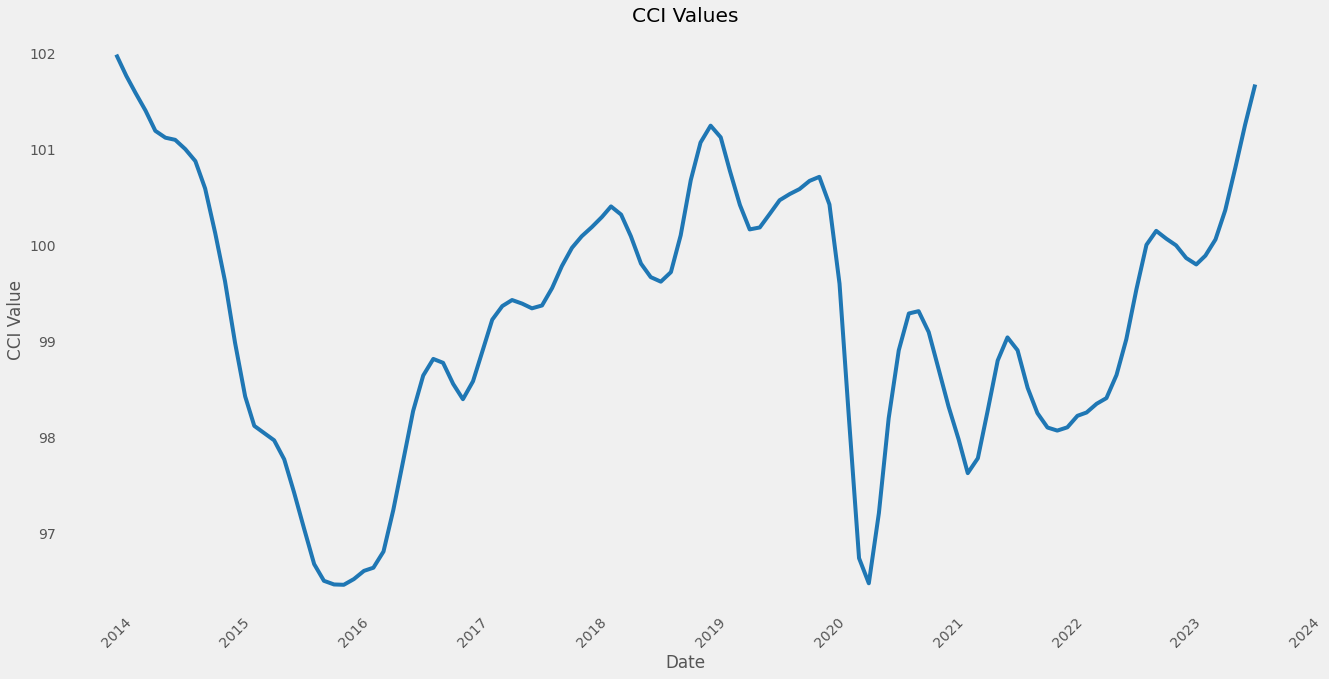

In [845]:
# Let's plot our cci values
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Create a plot
plt.plot(cci['date'], cci['cci_value'], color='tab:blue')

# Customize the appearance of the plot
plt.title('CCI Values')
plt.xlabel('Date')
plt.ylabel('CCI Value')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

In [846]:
cci.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,date,cci_value,Flag Codes
0,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-01-01,101.9879,NaN
1,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-02-01,101.7652,NaN
2,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-03-01,101.5893,NaN
3,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-04-01,101.4036,NaN
4,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-05-01,101.1933,NaN


Now that we have our data ready, let's merge our datasets

Let's merge our datasets to have a better understanding of the data. If our new data has an impact on sales, freight value, or price.

In [847]:
# Let's merge our three datasets with daily_sales
daily_sales = pd.merge(daily_sales, cci[['date', 'cci_value']], on='date')
daily_sales = pd.merge(daily_sales, inflation[['date', 'inflation_value']], on='date')
daily_sales = pd.merge(daily_sales, unemployment[['date', 'unemr_value']], on='date')

In [848]:
daily_sales.head()

,date,price,freight_value,quantity_sold,cci_value,inflation_value,unemr_value
0,2017-02-01,117.793281,19.530156,67,98.91882,4.758907,13.2
1,2017-03-01,109.940631,17.906036,141,99.22443,4.571105,13.7
2,2017-04-01,257.624559,19.763235,70,99.36663,4.082517,13.6
3,2017-05-01,93.546746,16.954762,143,99.42970,3.597256,13.3
4,2017-06-01,142.869259,18.096148,148,99.39207,2.998557,13.0


Great! Now that we have our data merged, let's check the correlation between our features

In [849]:
# Let's plot a correlation matrix with our features
corr = daily_sales.iloc[:, 1:-1].corr()
corr.style.background_gradient(cmap='rocket_r')

,price,freight_value,quantity_sold,cci_value,inflation_value
price,1.000000,0.228232,-0.211767,-0.179760,0.140919
freight_value,0.228232,1.000000,0.319191,0.116893,0.242310
quantity_sold,-0.211767,0.319191,1.000000,0.630159,-0.194877
cci_value,-0.179760,0.116893,0.630159,1.000000,-0.515951
inflation_value,0.140919,0.242310,-0.194877,-0.515951,1.000000


Okay, we can observe here that these macroeconomic features don't have a big impact on our prices but for our sales it does, for example, our CCI has a positive correlation with our quantity sold. In order to understand more the correlation, let's plot a chart.

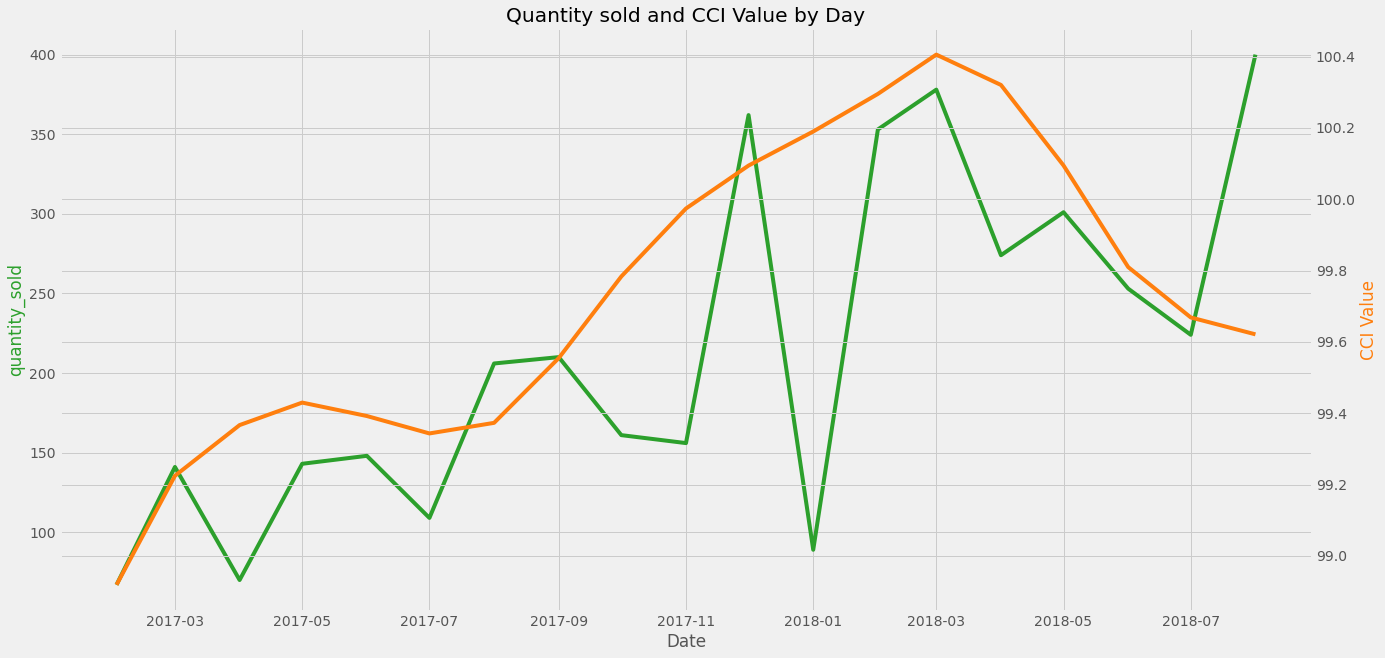

In [850]:
# Let's plot the freight value and cci_value
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Create two subplots with the shared x-axis
ax1, ax2, ax3 = plt.axes(), plt.subplot(), plt.subplot()

# Plot quantity sold (order_item_id) using the first y-axis (ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('quantity_sold', color='tab:green')
ax1.plot(daily_sales['date'], daily_sales['quantity_sold'], color='tab:green')
#ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (ax2) and plot price using it
ax2 = ax1.twinx()  # share the same x-axis
ax2.set_ylabel('CCI Value', color='tab:orange')
ax2.plot(daily_sales['date'], daily_sales['cci_value'], color='tab:orange')
#ax2.tick_params(axis='y', labelcolor='tab:orange')

# Customize the appearance of the plot
plt.title('Quantity sold and CCI Value by Day')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Now we observe when Consumer Index increases people tend to buy more in this e-commerce. Great, we have a feature that would help us to forecast our sales.

After checking the features that we are going to use. We can think of the products that we would like to optimize.

## Products to optimize

We have so many products in the dataset but to optimize our prices, we need to select the products that have enough data. We propose those items that have been sold at least 1 product and their price points are diverse. Let's find out.

In [851]:
# Let's add the week number plus the year to our dataset so we can check the variance of the quantity sold
orders_items['week_number'] = orders_items['order_purchase_timestamp'].dt.strftime('%Y-%U')
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_year,week_number
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017,2017-40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018,2018-29
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018,2018-31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017,2017-46
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018,2018-06


Let's going to filter those products and count how many products we have with the conditions that we propose.

In [852]:
# Let's group the products by unique prices and sales
grouped = orders_items.groupby('product_id').agg({
    'price': pd.Series.nunique,  # Count unique prices
    'order_id': 'count'  # Count total sales (orders)
}).reset_index()

# Filter products with multiple unique prices and consistent sales
filtered_products = grouped[(grouped['price'] > 10) & (grouped['order_id'] > 0)]

# Get the list of 'product_id' for the filtered products
filtered_product_ids = filtered_products['product_id'].tolist()

# Let's count the number of filtered products
print(f"The numbers of products to optimize: {len(filtered_product_ids)}")

The numbers of products to optimize: 35


How about if we plot some charts to evaluate their performance over time?

In [853]:
# Let's create a function that will take a list of product, select 4 random products and plot the weekly sales
def plot_weekly_sales(product_ids_list):
    # Randomly select 4 product IDs from the list
    selected_product_ids = random.sample(product_ids_list, 4)

    # Create a subplot with 2 rows and 2 columns to plot 4 charts side by side
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Quantity sold and Price by Week for Randomly Selected Products', fontsize=16)

    # Loop through the selected product IDs and plot each one on a separate subplot
    for i, product_id in enumerate(selected_product_ids):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        # Filter the data for the current product ID
        weekly_sales = orders_items.loc[orders_items['product_id'] == product_id].groupby(['week_number', 'product_id']).agg({'order_id': 'count', 'price': 'mean'}).reset_index().sort_values(by=['week_number'])
        weekly_sales = weekly_sales.rename(columns={'order_id': 'quantity_sold'})

        # Plot quantity sold using the first y-axis (ax1)
        ax.set_xlabel('Week Number')
        ax.set_ylabel('quantity_sold', color='tab:green')
        ax.plot(weekly_sales['week_number'], weekly_sales['quantity_sold'], color='tab:green', label='Quantity Sold')

        # Create a second y-axis (ax2) and plot price using it
        ax2 = ax.twinx()  # share the same x-axis
        ax2.set_ylabel('Price', color='tab:orange')
        ax2.plot(weekly_sales['week_number'], weekly_sales['price'], color='tab:orange', label='Price')

        # Customize the appearance of the subplot
        ax.set_title(f'Product ID: {product_id}')
        #ax.grid()
        ax2.legend(loc='upper right')

    # Adjust layout and spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plots
    plt.show()

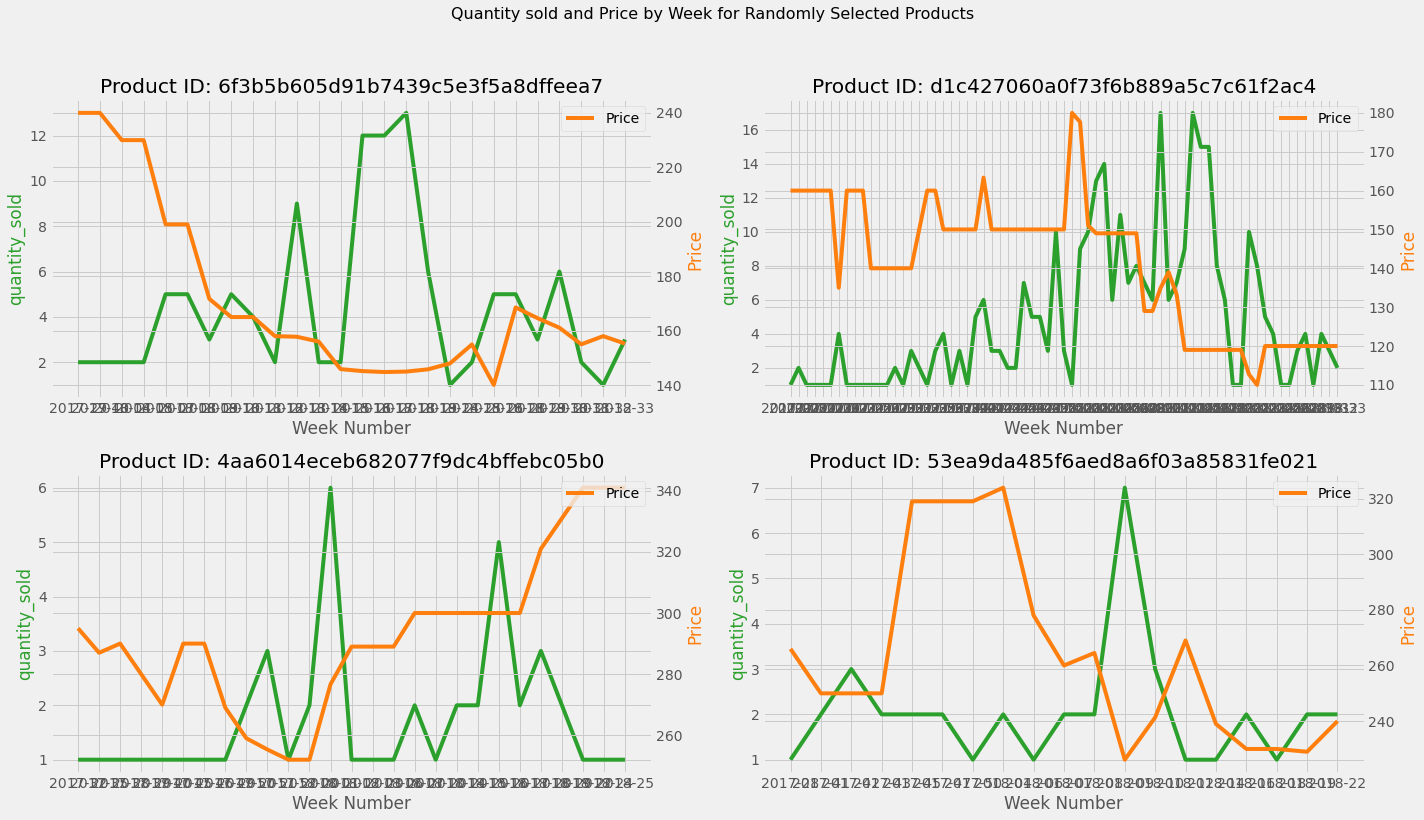

In [1439]:
plot_weekly_sales(filtered_product_ids)

Now let's see those products that has different prices during the weeks but keep their sales

Now that we have the products, let's forecast demand for the next week and see if we can optimize our prices.

In [855]:
filtered_product_ids

['0a57f7d2c983bcf8188589a5fea4a8da',
 '1a080577618e7fe4d9ddd8fb2b47a964',
 '2ffdf10e724b958c0f7ea69e97d32f64',
 '31b8e7c2a22f3dba5183cc110bdd72f7',
 '3225c54bb2785c33f49f50398fcdb88c',
 '36f60d45225e60c7da4558b070ce4b60',
 '41c24b8ce92d1a2cac62db5edfd088b2',
 '4298b7e67dc399c200662b569563a2b2',
 '437c05a395e9e47f9762e677a7068ce7',
 '461f43be3bdf8844e65b62d9ac2c7a5a',
 '4aa6014eceb682077f9dc4bffebc05b0',
 '4fe644d766c7566dbc46fb851363cb3b',
 '53b36df67ebb7c41585e8d54d6772e08',
 '53ea9da485f6aed8a6f03a85831fe021',
 '595fac2a385ac33a80bd5114aec74eb8',
 '656e0eca68dcecf6a31b8ececfabe3e8',
 '69455f41626a745aea9ee9164cb9eafd',
 '6f3b5b605d91b7439c5e3f5a8dffeea7',
 '73326828aa5efe1ba096223de496f596',
 '73bcea88583002fe12b7399af4ae60da',
 '7a10781637204d8d10485c71a6108a2e',
 '8317b177579dd27ff068b83205e2169b',
 '91c82ace62e0ca1b69b1a45bcc214b45',
 '921d31a1daa51460b7a95ea5f3ab64d5',
 '9ddc4249779322828f89d2a9c04f7ee1',
 'bce474cc95b6e77657e10939b0b4248c',
 'cac9e5692471a0700418aa3400b9b2b1',
 

In [941]:
orders_items

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_year,week_number
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017,2017-40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018,2018-29
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018,2018-31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017,2017-46
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018,2018-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110183,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,2018,2018-05
110184,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,2017,2017-35
110185,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,2018,2018-01
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,2018,2018-01


In [1444]:
id = orders_items.loc[orders_items['product_id'] == '7a10781637204d8d10485c71a6108a2e'].groupby(['order_purchase_timestamp', 'price', 'freight_value'])['order_id'].count().reset_index()
# Now let's change the name of the columns as date and quantity_sold
id = id.rename(columns={'order_purchase_timestamp': 'date', 'order_id': 'quantity_sold'})
# Let's add the year and moth to the dataset so we can match with our cci_values dataset
id['month'] = id['date'].dt.strftime('%Y-%m')
# Let's set the date as the index

id.head()


,date,price,freight_value,quantity_sold,month
0,2017-08-06 16:19:28,229.9,16.36,1,2017-08
1,2017-08-08 21:09:52,229.9,16.36,1,2017-08
2,2017-08-10 19:52:54,229.9,13.11,1,2017-08
3,2017-08-12 10:28:37,229.9,13.11,1,2017-08
4,2017-08-13 14:41:35,229.9,16.36,1,2017-08


In [1445]:
id.tail()

,date,price,freight_value,quantity_sold,month
135,2018-05-08 19:25:07,199.0,0.0,1,2018-05
136,2018-05-09 13:38:49,199.0,0.0,1,2018-05
137,2018-05-09 15:56:50,199.0,0.0,1,2018-05
138,2018-05-09 21:55:23,199.0,0.0,1,2018-05
139,2018-05-12 11:47:38,199.0,0.0,1,2018-05


In [1446]:
# Let's add the cci_value to our id dataset but our cci dates is in monthtly format so we need to identify the month and year
cci['month'] = cci['date'].dt.strftime('%Y-%m')
cci.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,date,cci_value,Flag Codes,month
0,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-01-01,101.9879,NaN,2014-01
1,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-02-01,101.7652,NaN,2014-02
2,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-03-01,101.5893,NaN,2014-03
3,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-04-01,101.4036,NaN,2014-04
4,BRA,CCI,AMPLITUD,LTRENDIDX,M,2014-05-01,101.1933,NaN,2014-05


In [1447]:
# Let's add the unemployment_rate to our id dataset but our unemployment dates is in monthly format so we need to identify the month and year
unemployment['month'] = unemployment['date'].dt.strftime('%Y-%m')
unemployment.head()

,date,unemr_value,month
0,2013-08-01,7.1,2013-08
1,2013-09-01,6.9,2013-09
2,2013-10-01,6.7,2013-10
3,2013-11-01,6.5,2013-11
4,2013-12-01,6.2,2013-12


In [1448]:
# Let's merge our two datasets
id = pd.merge(id, cci[['month', 'cci_value']], on='month')
# Now let's merge our unemployment dataset
id = pd.merge(id, unemployment[['month', 'unemr_value']], on='month')
# Let's drop the month column
id = id.drop(columns=['month'])
# The last weeks of freight_value are 0, let's fill them with the last value
id['freight_value'] = id['freight_value'].replace(0, 15.550)
id.tail()

,date,price,freight_value,quantity_sold,cci_value,unemr_value
135,2018-05-08 19:25:07,199.0,15.55,1,100.0945,12.7
136,2018-05-09 13:38:49,199.0,15.55,1,100.0945,12.7
137,2018-05-09 15:56:50,199.0,15.55,1,100.0945,12.7
138,2018-05-09 21:55:23,199.0,15.55,1,100.0945,12.7
139,2018-05-12 11:47:38,199.0,15.55,1,100.0945,12.7


In [1449]:
# Let's set the date as the index
id = id.set_index('date')
# Let's resample our data id by week but sum the quantity sold and the median of the price
w_data = id.resample('W').agg({'quantity_sold': 'sum', 'price': 'median', 'cci_value': 'median', 'freight_value': 'median'}).reset_index()
# Let's fill the null values with the previous price
w_data['price'] = w_data['price'].fillna(method='ffill')
w_data['cci_value'] = w_data['cci_value'].fillna(method='ffill')
w_data['freight_value'] = w_data['freight_value'].fillna(method='ffill')
# Let's set the date as the index
w_data.head()

,date,quantity_sold,price,cci_value,freight_value
0,2017-08-06,1,229.9,99.37289,16.360
1,2017-08-13,4,229.9,99.37289,14.735
2,2017-08-20,0,229.9,99.37289,14.735
3,2017-08-27,3,229.9,99.37289,16.360
4,2017-09-03,2,229.9,99.55448,16.545


In [1423]:
w_data.to_csv('./files/w_data.csv')

# Until here

### First let's bring more info to our product

In [ ]:
# Let's upload details of the products
products = pd.read_csv('./files/olist_products_dataset.csv')
# Let's merge with product_category_name_translation to have the translation from Brazil to English
en_cat = pd.read_csv('./files/product_category_name_translation.csv')
products_items = pd.merge(products, en_cat, on='product_category_name')
products_items.head()

### Our data is in Portuguese, let's translate into English with another data dataset that has the relation

In [ ]:
df = pd.merge(orders_items, products_items[['product_id', 'product_category_name_english']], on='product_id')
df.head()

## Time series

### Linear regression

In [1465]:
j = w_data.groupby(['price']).agg({'quantity_sold' : 'sum', 'profit' : 'sum'}).reset_index()
j

,price,quantity_sold,profit
0,159.0,4,562.44
1,199.0,25,4586.25
2,204.0,17,3180.05
3,209.0,5,958.76
4,209.9,14,2668.91
5,212.0,6,1176.87
6,214.0,3,585.75
7,219.0,12,2279.23
8,219.9,40,8078.24
9,228.9,1,215.80


In [1470]:
prices = np.array(j['price'])
profits = np.array(j['profit'])
len(prices), len(profits)

(13, 13)

In [1463]:
w_data.corr()

,price,freight_value,quantity_sold,profit
price,1.000000,-0.028188,-0.212751,-0.166114
freight_value,-0.028188,1.000000,-0.053005,-0.063132
quantity_sold,-0.212751,-0.053005,1.000000,0.997664
profit,-0.166114,-0.063132,0.997664,1.000000


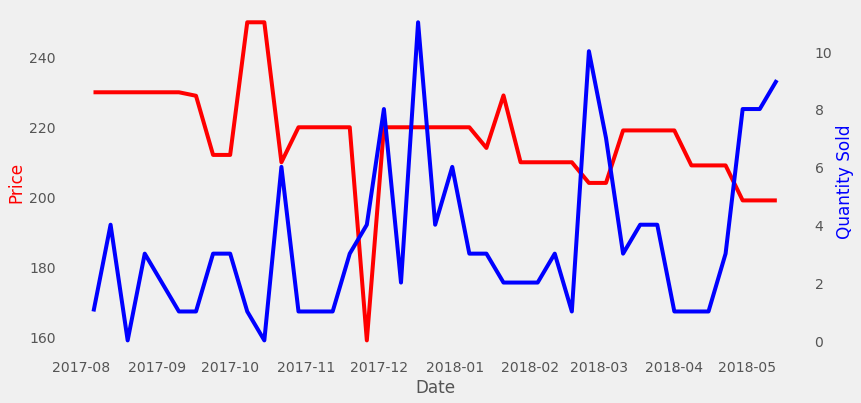

In [1425]:
# Let's plot the price and the quantity sold over weeks in different axes
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(w_data['date'], w_data['price'], color='red')
ax2.plot(w_data['date'], w_data['quantity_sold'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='red')
ax2.set_ylabel('Quantity Sold', color='blue')

# Let's get out of both grids
ax1.grid(False)
ax2.grid(False)

plt.show()

In [1426]:
# Let's prepare our data to train our regrression model
X= w_data[['quantity_sold', 'cci_value', 'freight_value']]
y= w_data[['price']]

### Let's standerize our data

In [1427]:
# Let's import library to standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [1428]:
# Let's split our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Now let's import gradient boosting regressor

In [1429]:
# Importing gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

# Let's train our model
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

# Let's predict the price
y_pred = reg.predict(X_test)

# Let's evaluate our model with r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.34079062138984184

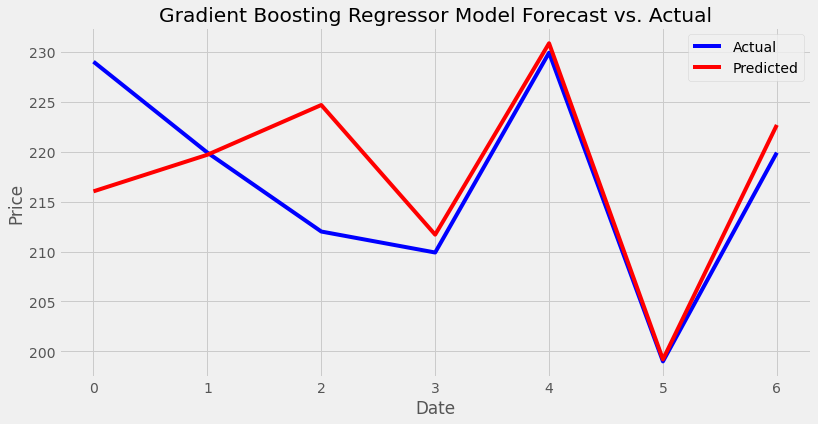

In [1383]:
# Now let's evaluate our model with root mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

# Let's print our predictions with the actual values
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
y_test = y_test.reset_index(drop=True)
y_test = y_test.join(y_pred)
y_test

# Let's plot our predictions with the actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test['price'], label='Actual', color='blue')
plt.plot(y_test['Predictions'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Gradient Boosting Regressor Model Forecast vs. Actual')
plt.show()

In [1384]:
# Let's create a function to make predictions
def predict_price(quantity_sold, cci_value, freight_value):
    price = reg.predict(scaler.transform([[quantity_sold, cci_value, freight_value]]))
    print(f'Predicted price: {price[0]}')

In [1385]:
w_data.tail()

,date,quantity_sold,price,cci_value,freight_value
36,2018-04-15,1,209.0,100.3203,15.55
37,2018-04-22,3,209.0,100.3203,0.00
38,2018-04-29,8,199.0,100.3203,0.00
39,2018-05-06,8,199.0,100.0945,0.00
40,2018-05-13,9,199.0,100.0945,0.00


In [1386]:
# Let's create a list of quantity sold
cci_value = 100
freight_value = 15.55

# Now let's iterate through the list and make predictions
for i in range(1, 10):
    print(f'Quantity sold: {i}')
    predict_price(i, cci_value, freight_value)

Quantity sold: 1
Predicted price: 181.09482931263173
Quantity sold: 2
Predicted price: 181.56086922831767
Quantity sold: 3
Predicted price: 181.56086922831767
Quantity sold: 4
Predicted price: 175.16835805885287
Quantity sold: 5
Predicted price: 175.16835805885287
Quantity sold: 6
Predicted price: 175.16835805885287
Quantity sold: 7
Predicted price: 174.91627827342765
Quantity sold: 8
Predicted price: 178.67645068393438
Quantity sold: 9
Predicted price: 178.56607476415576


# Price Optimization

First, let's create the function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your price and profit data
prices = np.array([209.9, 212., 214., 219., 219.9, 228.9, 229., 229.9, 249.9])
profits = np.array([2668.91, 1176.87, 585.75, 2279.23, 8078.24, 215.8, 413.38, 2358.32, 230.9])

# Fit a polynomial regression model (in this case, let's use a polynomial of degree 2)
degree = 3
coefficients = np.polyfit(prices, profits, degree)

# Create the polynomial fit function
polyfit_func = np.poly1d(coefficients)

# Generate a range of x values for the plot
x_values = np.linspace(min(prices), max(prices), 100)

# Calculate corresponding y values using the polynomial fit function
y_values = polyfit_func(x_values)

# Create a scatterplot of the data
plt.scatter(prices, profits, label='Data Points', color='b', marker='o')

# Plot the polynomial fit curve
plt.plot(x_values, y_values, label=f'Polyfit (degree {degree})', color='r')

plt.title('Polynomial Regression Fit')
plt.xlabel('Price')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Let's plot the function

In [ ]:
# Create the polynomial fit function
polyfit_func = np.poly1d(coefficients)

# Print the polynomial function
print("Polynomial Fit Function:")
print(polyfit_func)

### Let's use the function to optimize our prices

In [ ]:
from scipy.optimize import minimize_scalar

# Define the profit function based on your new polynomial function
def profit(price):
    # Define your new polynomial function coefficients
    coefficients = [0.8744, -604.5, 1.389e+05, -1.061e+07]
    return -(coefficients[0] * price**3 + coefficients[1] * price**2 + coefficients[2] * price + coefficients[3])

# Define the price constraints
price_bounds = (190, 240)

# Use minimize_scalar to find the maximum profit
result = minimize_scalar(profit, bounds=price_bounds, method='bounded')

# Extract the optimized price and maximized profit
optimized_price = result.x
maximized_profit = -result.fun  # Convert back to positive

# Print the results
print(f"Optimal Price: ${optimized_price:.2f}")
print(f"Maximized Profit: ${maximized_profit:.2f}")